# Project 1

## Levon Dovlatyan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

params = {'legend.fontsize': '16',
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'16',
         'ytick.labelsize':'16'}
pylab.rcParams.update(params)

%matplotlib inline

### Part 1A

In [2]:
import string

# load data
def parse_data(fname):
    data = []
    for line in open(fname):
        # split string in two by space so first word is id, second word is rest of document
        id_data = line.split(' ',1)[0]
        # apply lower case and removal of all punctuations + next line (\n) and white space ( )
        s_data = line.split(' ',1)[1].lower().translate(None, ' \n'+string.punctuation)
        data.append((id_data,s_data))
    return data

# load truth data
def parse_data_truth(fname):
    data = []
    for line in open(fname):
        # split string in two
        f1 = line.split(' ',1)[0].translate(None, ' \n')
        f2 = line.split(' ',1)[1].translate(None, ' \n')
        data.append((f1,f2))
    return data
        

### Part 1B

In [3]:
import binascii

def shingle_document(astring,k):
    data = []
    for i in range(len(astring)-k+1):
        data.append(binascii.crc32(astring[i:(i+k)]))
        #data.append(astring[i:(i+k)]) # for testing
    return np.unique(data) # need to return sets, not bags

### Part 1C

In [4]:
def jaccard(st1,st2):    
    # concat, and sort
    st = np.sort(np.concatenate((st1,st2)))
    
    # assume initially no intersection and all union
    inter = 0.
    union = len(st)
    
    for i in range(union-1):
        if st[i] == st[i+1]:
            # for each intersection add count to inter and remove count from union
            inter += 1
            union -= 1
            
    return inter / union # Jaccard distance would be d(x,y) = 1 - JSIM(x,y)

def jaccard_test(st1,st2):
    # test method using numpy functions to make sure my jaccard method works correctly.
    return len(np.intersect1d(st1,st2))*1.0 / len(np.union1d(st1,st2))*1.0

### Part 1D

In [5]:
from itertools import combinations # to find all pairs in a set, basically (N choose 2)

def processData(fid,k):
    data = []
    dt = parse_data(fid) # parse data
    dt_truth = parse_data_truth(fid[0:-5]+'truth') # parse truth data
    N = len(dt)
    
    for dtpair in combinations(dt, 2):  # N choose 2 to loop through all pairs
        dt1 = shingle_document(dtpair[0][1],k)
        dt2 = shingle_document(dtpair[1][1],k)
        dtjac = jaccard(dt1,dt2)
        if ((dtpair[0][0],dtpair[1][0]) or (dtpair[1][0],dtpair[0][0])) in dt_truth:
            data.append((dtpair[0][0],dtpair[1][0],dtjac,'Y'))
        else:
            data.append((dtpair[0][0],dtpair[1][0],dtjac,'N'))
    return data

### Simple sanity test to make sure everything above works (worked out by hand)

In [6]:
x = 'test123test221'
y = '231test123test'
x1 = shingle_document(x,3)
y1 = shingle_document(y,3)

print jaccard(x1,y1)
print jaccard_test(x1,y1)

0.538461538462
0.538461538462


### Part 1E

- Generate data

In [8]:
# Generate calculations and save data to memory

# compute jaccard similarity for all pairs and save data
# run time seems to scale as O(n^2) with n=100 taking about ~5-8 seconds for each shingle length

import time

dontrunthis()

fname = 'data/articles_1000.train'
ks = np.arange(1,20)
jacs = []

for k in ks:
    start_time = time.time()
    jacs.append(processData(fname,k))
    print ' --- '+str(time.time()-start_time)+' seconds --- | k = '+str(k)+' / '+str(ks[-1])
    # save data every iteration
    np.save('data_1000.npy',jacs)

NameError: name 'dontrunthis' is not defined

- Initial glance at data

In [9]:
# Load and analyze data

import pandas

# load data
jacs = np.load('data_1000.npy')

# put data into array of panda dataframes
dts = []
for jac in jacs: # for each shingle length
    dts.append(pandas.DataFrame(jac,columns=['id1','id2','JSIM','plagiarized']))

In [10]:
# first few entries for k = 4
k=4
dts[k-1].head()

,id1,id2,JSIM,plagiarized
0,t120,t121,0.104062072113,N
1,t120,t122,0.0901639344262,N
2,t120,t123,0.085520361991,N
3,t120,t124,0.0837297811608,N
4,t120,t125,0.150289017341,N


In [11]:
# Find all plagerized files for with k = 1
k = 1
dts[k-1][dts[k-1]['plagiarized'].str.match('Y')]

,id1,id2,JSIM,plagiarized
97745,t980,t2023,1.0,Y
114897,t1088,t5015,1.0,Y
139852,t1297,t4638,1.0,Y
177843,t1768,t5248,1.0,Y
178473,t1952,t3495,1.0,Y
229635,t2535,t8642,1.0,Y
242732,t2839,t9303,1.0,Y
247551,t2957,t7111,1.0,Y
277191,t3268,t7998,1.0,Y
303023,t3466,t7563,1.0,Y


- Analyze data

In [12]:
aveJac_N = []
aveJac_Y = []
errJac_N = []
errJac_Y = []

ks = np.arange(1,20)
for k in ks:
    # generate list for each k
    tmp1=dts[k-1][dts[k-1]['plagiarized'].str.match('Y')]['JSIM']
    tmp2=dts[k-1][dts[k-1]['plagiarized'].str.match('N')]['JSIM']
    
    # add average jaccard sim and std to our plotting arrays
    aveJac_Y.append(pandas.to_numeric(tmp1).mean())
    errJac_Y.append(pandas.to_numeric(tmp1).std())
    aveJac_N.append(pandas.to_numeric(tmp2).mean())
    errJac_N.append(pandas.to_numeric(tmp2).std())

- Visualize data

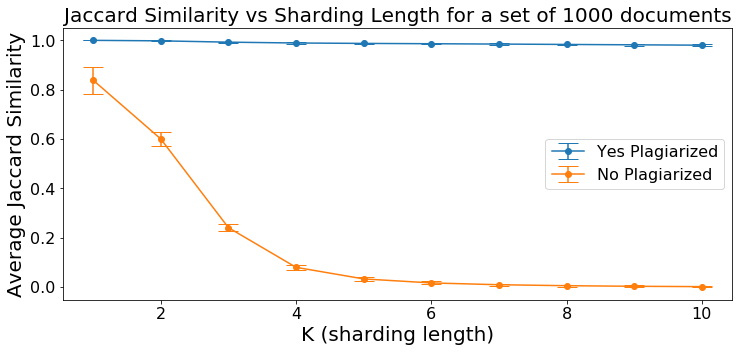

In [18]:
plt.figure(figsize=(12,5))

plt.errorbar(ks[0:10],aveJac_Y[0:10],yerr=errJac_Y[0:10],capsize=10,fmt='o-',label='Yes Plagiarized')
plt.errorbar(ks[0:10],aveJac_N[0:10],yerr=errJac_N[0:10],capsize=10,fmt='o-',label='No Plagiarized')

plt.title('Jaccard Similarity vs Sharding Length for a set of 1000 documents')
plt.xlabel('K (sharding length)')
plt.ylabel('Average Jaccard Similarity')
plt.legend()